### **Task 1 : Ascending the Gradient Descent [6 marks]**

In [14]:
import numpy as np
import torch
import torch.autograd as autograd
import matplotlib.pyplot as plt

$1.1$ 
Use torch.autograd to find the true gradient on the above dataset using linear regression (in the form 
$θ_1$
x
+
$θ_0$
) for any given values of 
(
$θ_0$
,
$θ_1$
)
.

In [15]:
np.random.seed(45)
num_samples = 40
# Generate data
x1 = np.random.uniform(-1, 1, num_samples)
f_x = 3*x1 + 4
eps = np.random.randn(num_samples)
y = f_x + eps
x = torch.tensor(x1, requires_grad=True)
ytensor = torch.tensor(y, requires_grad=True)

theta0 = torch.tensor(0.0, requires_grad=True)
theta1 = torch.tensor(0.0, requires_grad=True)

ypred = theta0 + theta1 * x
mseloss = ((ytensor-ypred)**2).mean()
grad = autograd.grad(mseloss, [theta0,theta1])

print(f"Gradient wrt theta0: {grad[0]}")
print(f"Gradient wrt theta1: {grad[1]}")

Gradient wrt theta0: -7.447053909301758
Gradient wrt theta1: -1.0253016948699951


In [16]:
import numpy as np

X = np.vstack([np.ones(len(x1)), x1]).T  # Add bias term (ones for theta_0)
theta_exact = np.linalg.inv(X.T @ X) @ X.T @ y
print(f"Exact theta0: {theta_exact[0]}, Exact theta1: {theta_exact[1]}")
minloss = ((ytensor-theta_exact[0]-theta_exact[1]*x)**2).mean()

Exact theta0: 3.9507064023194527, Exact theta1: 2.6824689259670587


$1.2$ Using the same 
(
$θ_0
,
θ_1$
)
 as above, calculate the stochastic gradient for all points in the dataset. Then, find the average of all those gradients and show that the stochastic gradient is a good estimate of the true gradient.

In [17]:
theta0_sgd = (-2*(ytensor-ypred)).mean()
theta1_sgd = 0
for i in range(len(x)):
    theta1_sgd -= 2*x[i]*(ytensor[i]-ypred[i])
theta1_sgd/=len(x)
print(f"Gradient wrt theta0: {theta0_sgd}")
print(f"Gradient wrt theta1: {theta1_sgd}")

Gradient wrt theta0: -7.447053920097924
Gradient wrt theta1: -1.0253017532346633


In [18]:
print(f"Difference between gradient of Theta0 obtained by SGD and Autograd is {abs(theta0_sgd-grad[0])}")
print(f"Difference between gradient of Theta1 obtained by SGD and Autograd is {abs(theta1_sgd-grad[1])}")

Difference between gradient of Theta0 obtained by SGD and Autograd is 1.0796166627358161e-08
Difference between gradient of Theta1 obtained by SGD and Autograd is 5.836466820952069e-08


#### As we can see the difference between the values obtained by Stochastic Gradient Descent and True Gradient is very small. Therefore we can conclude SGD is good estimate of True Gradient.

$1.3$ Calculate the average number of iterations required for each method to get sufficiently close to the optimal solution, where "sufficiently close" means within a distance of 
ϵ
 (or 
ϵ
-neighborhood) from the minimum value of the loss function. Visualize the convergence process for 15 epochs. Choose 
ϵ as
0.001
 for convergence criteria. Which optimization process takes a larger number of epochs to converge, and why? Show the contour plots for different epochs (or show an animation/GIF) for visualisation of optimisation process. Also, make a plot for Loss v/s epochs for all the methods.

0.5966995162957194
130
Theta0 for minimum loss function is: 3.9441753958560835
Theta1 for minimum loss function is: 2.6289387550166974


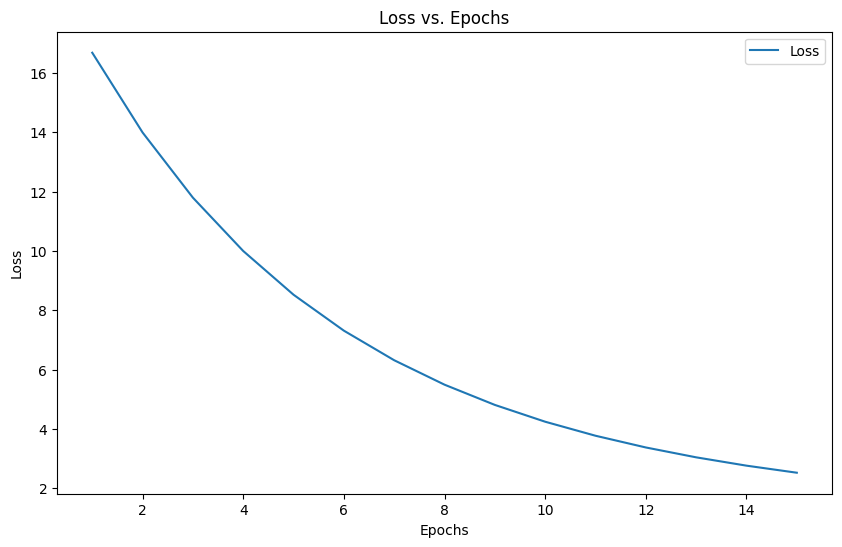

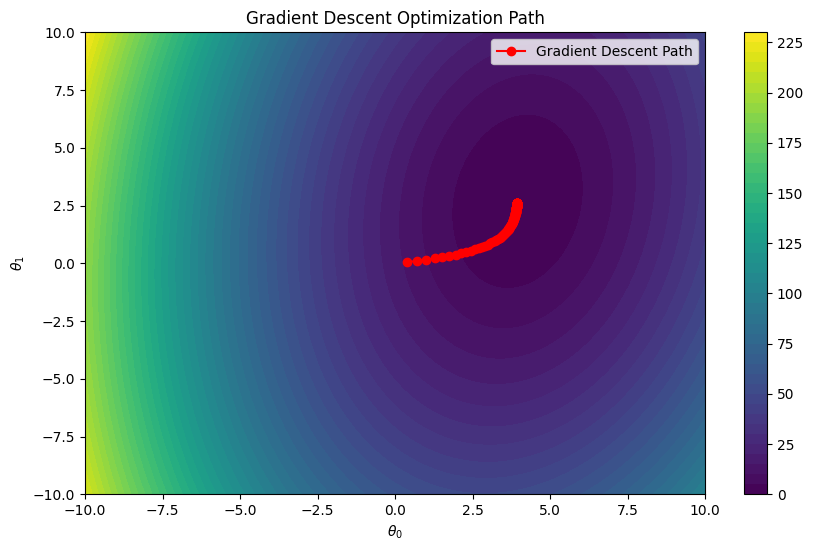

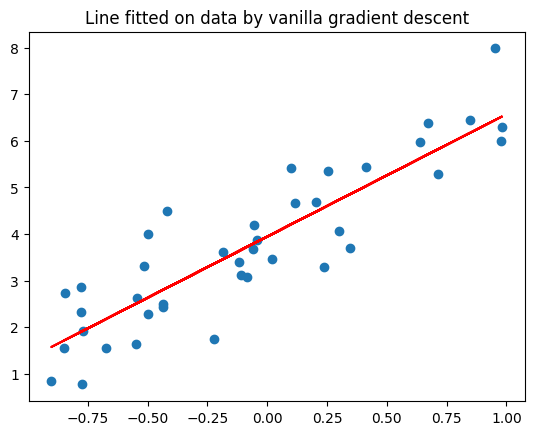

In [19]:
if ytensor.dtype == torch.float64:
    ytensor = ytensor.detach().numpy()
    x = x.detach().numpy()
theta0_fgd = 0
theta1_fgd = 0
lr = 0.1
theta0_vals = []
theta1_vals = []
loss_vals = []
for i in range(2000):
    ypred = theta0_fgd + theta1_fgd * x
    theta0_fgd -= -lr*(sum(ytensor-ypred))/len(x)
    theta1_fgd -= -lr*(sum((ytensor-ypred)*x))/len(x)
    theta0_vals.append(theta0_fgd)
    theta1_vals.append(theta1_fgd)
    loss_vals.append(((ytensor - ypred) ** 2).mean())
    if abs(minloss - ((ytensor-ypred)**2).mean()) <0.001:
        print(((ytensor-ypred)**2).mean())
        print(i)
        break
print(f"Theta0 for minimum loss function is: {theta0_fgd}")
print(f"Theta1 for minimum loss function is: {theta1_fgd}")

plt.figure(figsize=(10, 6))
plt.plot(range(1,16), loss_vals[0:15], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()

theta0_range = np.linspace(-10, 10, 100)
theta1_range = np.linspace(-10, 10, 100)
T0, T1 = np.meshgrid(theta0_range, theta1_range)
Z = np.zeros_like(T0)
for i in range(len(theta0_range)):
    for j in range(len(theta1_range)):
        y_pred = T0[i, j] + T1[i, j] * x
        Z[i, j] = ((ytensor - y_pred) ** 2).mean()

plt.figure(figsize=(10, 6))
plt.contourf(T0, T1, Z, levels=50, cmap='viridis')
plt.colorbar()
plt.plot(theta0_vals, theta1_vals, 'ro-', label='Gradient Descent Path')
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.title('Gradient Descent Optimization Path')
plt.legend()
plt.show()
plt.scatter(x1,y)
line = theta0_fgd + theta1_fgd*x1
plt.plot(x1,line,'r')
plt.title('Line fitted on data by vanilla gradient descent')
plt.show()

Final MSE = 0.5966605717110862
32
1287
Theta0 for minimum loss function is: 3.958244448032709
Theta1 for minimum loss function is: 2.6325863238575624


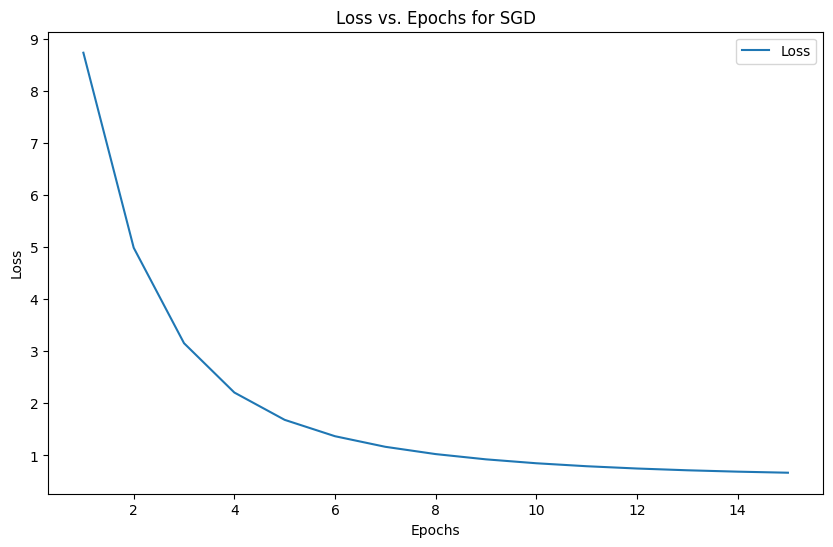

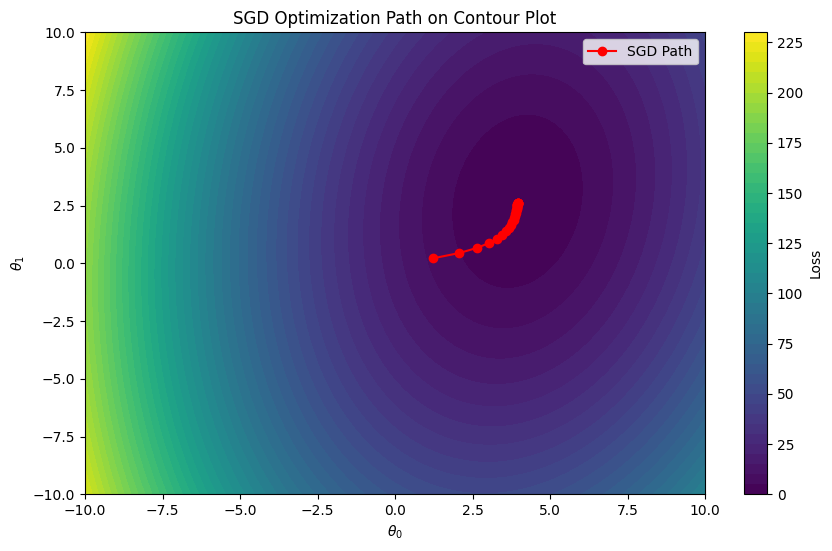

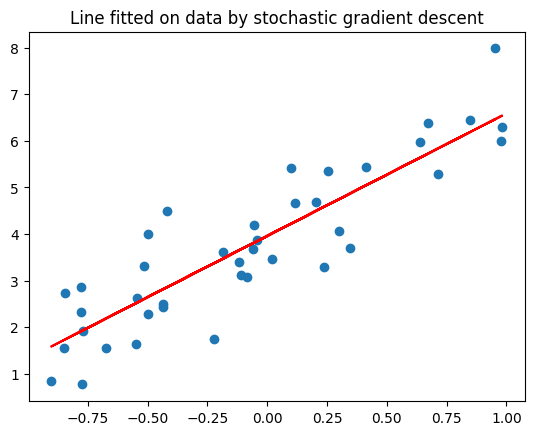

In [20]:
theta0_sgd = 0
theta1_sgd = 0
theta0_vals = []
theta1_vals = []  
loss_valsgd = []
lr = 0.01
for epoch in range(2000):
    for i in range(len(x)):
        ypred = theta0_sgd + theta1_sgd * x[i]
        theta0_sgd -= -lr*(ytensor[i]-ypred)
        theta1_sgd -= -lr*((ytensor[i]-ypred)*x[i])
    loss = ((ytensor - theta0_sgd-theta1_sgd*x) ** 2).mean()
    loss_valsgd.append(loss)
    theta0_vals.append(theta0_sgd)
    theta1_vals.append(theta1_sgd)
    if abs(minloss-loss) < 0.001:
        print(f"Final MSE = {loss}")
        print(epoch)
        print(epoch*len(x)+i-epoch)
        break
print(f"Theta0 for minimum loss function is: {theta0_sgd}")
print(f"Theta1 for minimum loss function is: {theta1_sgd}")

plt.figure(figsize=(10, 6))
plt.plot(range(1,16), loss_valsgd[0:15], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs for SGD')
plt.legend()
plt.show()


theta0_range = np.linspace(-10, 10, 100)
theta1_range = np.linspace(-10, 10, 100)
T0, T1 = np.meshgrid(theta0_range, theta1_range)
Z = np.zeros_like(T0)


for i in range(len(theta0_range)):
    for j in range(len(theta1_range)):
        y_pred = T0[i, j] + T1[i, j] * x
        Z[i, j] = ((ytensor - y_pred) ** 2).mean()


plt.figure(figsize=(10, 6))
plt.contourf(T0, T1, Z, levels=50, cmap='viridis')
plt.colorbar(label='Loss')
plt.plot(theta0_vals, theta1_vals, 'ro-', label='SGD Path')
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.title('SGD Optimization Path on Contour Plot')
plt.legend()
plt.show()
plt.scatter(x1,y)
line = theta0_sgd + theta1_sgd*x1
plt.plot(x1,line,'r')
plt.title('Line fitted on data by stochastic gradient descent')
plt.show()

Final MSE = 0.5965974652609571
16
654
Theta0 for minimum loss function is: 3.944923531680525
Theta1 for minimum loss function is: 2.630257146936746


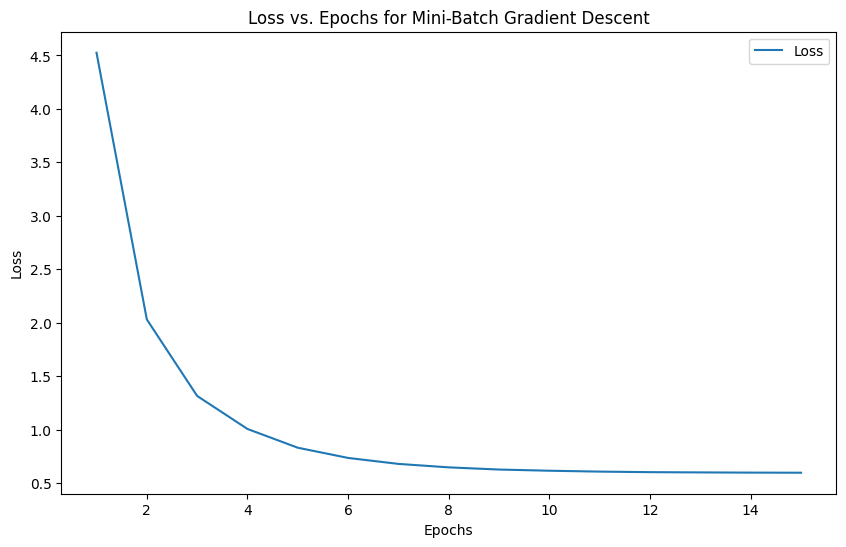

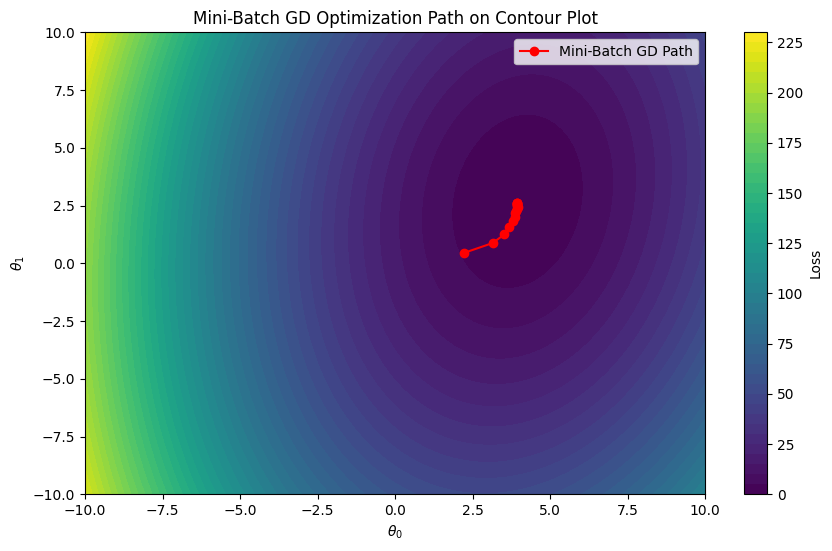

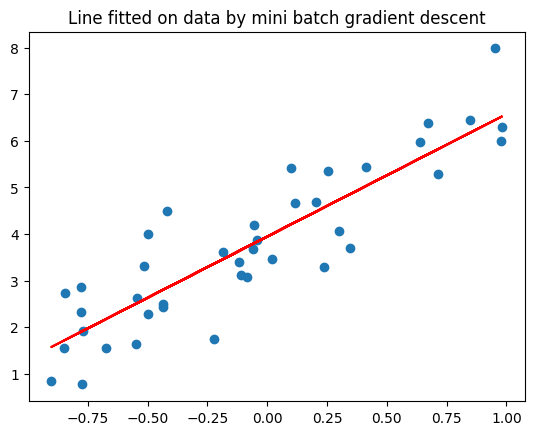

In [29]:
theta0_mbgd = 0
theta1_mbgd = 0  
batch_size = 10
theta0_vals = []
theta1_vals = []  
loss_valsm = []
lr = 0.1

for epoch in range(500):
    shuffled_indices = np.random.permutation(len(x))
    x_shuffled = x[shuffled_indices]
    y_shuffled = ytensor[shuffled_indices]   
    for i in range(0, len(x), batch_size):
        x_batch = x_shuffled[i:i+batch_size]
        y_batch = y_shuffled[i:i+batch_size]
        ypred_batch = theta0_mbgd + theta1_mbgd * x_batch
        theta0_mbgd += 2*lr*(sum(y_batch - ypred_batch))/len(x_batch)
        theta1_mbgd += 2*lr*(sum((y_batch - ypred_batch)*x_batch)/len(x_batch))
    loss = ((ytensor - theta0_mbgd - theta1_mbgd*x) ** 2).mean()  #total
    loss_valsm.append(loss)
    theta0_vals.append(theta0_mbgd)
    theta1_vals.append(theta1_mbgd)
    if abs(minloss-loss) < 0.001:
        print(f"Final MSE = {loss}")
        print(epoch)
        print(epoch*len(x)+i-epoch)
        break
print(f"Theta0 for minimum loss function is: {theta0_mbgd}")
print(f"Theta1 for minimum loss function is: {theta1_mbgd}")


plt.figure(figsize=(10, 6))
plt.plot(range(1,16), loss_valsm[0:15], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs for Mini-Batch Gradient Descent')
plt.legend()
plt.show()


theta0_range = np.linspace(-10, 10, 100)
theta1_range = np.linspace(-10, 10, 100)
T0, T1 = np.meshgrid(theta0_range, theta1_range)
Z = np.zeros_like(T0)


for i in range(len(theta0_range)):
    for j in range(len(theta1_range)):
        y_pred = T0[i, j] + T1[i, j] * x
        Z[i, j] = ((ytensor - y_pred) ** 2).mean()


plt.figure(figsize=(10, 6))
plt.contourf(T0, T1, Z, levels=50, cmap='viridis')
plt.colorbar(label='Loss')
plt.plot(theta0_vals, theta1_vals, 'ro-', label='Mini-Batch GD Path')
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.title('Mini-Batch GD Optimization Path on Contour Plot')
plt.legend()
plt.show()
plt.scatter(x1,y)
line = theta0_mbgd + theta1_mbgd*x1
plt.plot(x1,line,'r')
plt.title('Line fitted on data by mini batch gradient descent')
plt.show()
    


#### Full batch Gradient Descent take largest number of epoches as it updates theta values only once per epoch but in stochastic and mini batch theta values are updated multiple times per epoch.

$1.4$ Explore the article here on gradient descent with momentum. Implement gradient descent with momentum for the dataset. Visualize the convergence process for 15 steps. Compare the average number of steps taken with gradient descent (for variants full batch and stochastic) with momentum to that of vanilla gradient descent to converge to an 
ϵ
-neighborhood for both dataset. Choose 
ϵ
as
0.001
. Write down your observations. Show the contour plots for different epochs for momentum implementation. Specifically, show all the vectors: gradient, current value of theta, momentum, etc.

Final MSE = 0.5959908749392316
Converged in 37 epochs
Theta0 for minimum loss function is: 3.935255246212187
Theta1 for minimum loss function is: 2.6750440547884367


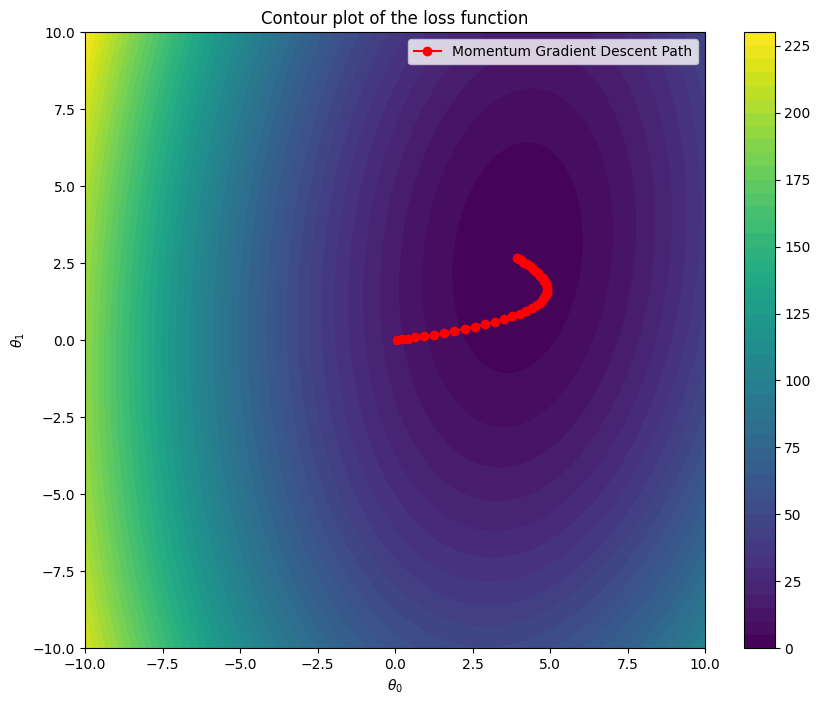

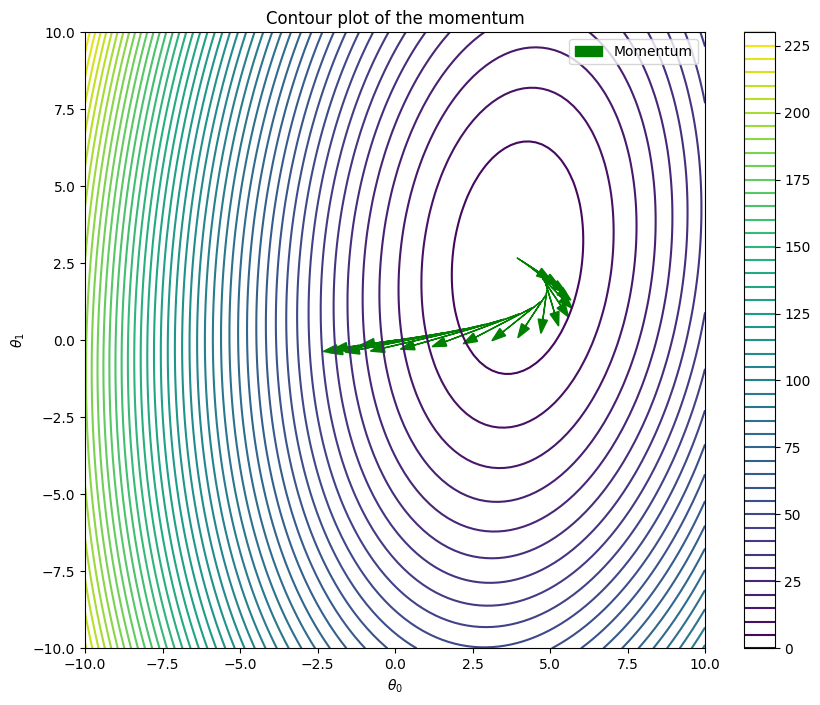

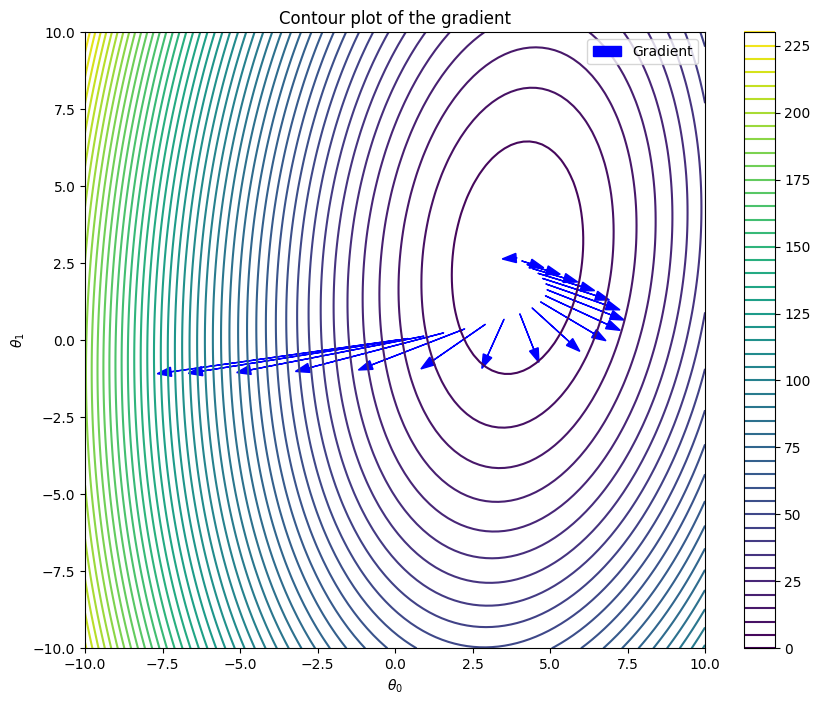

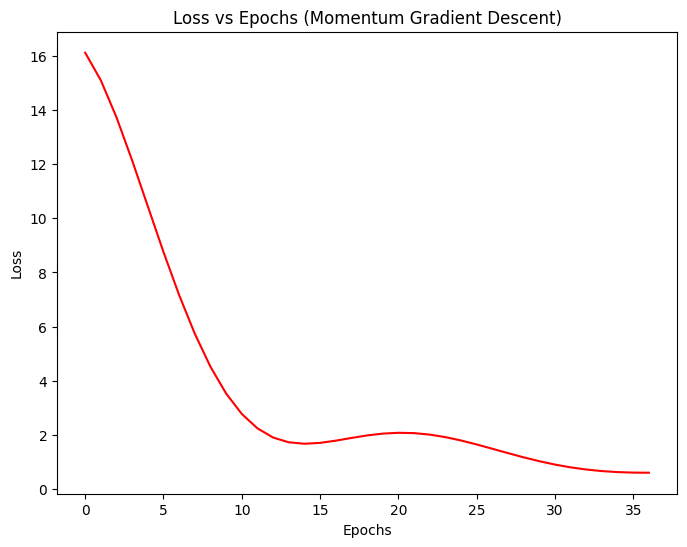

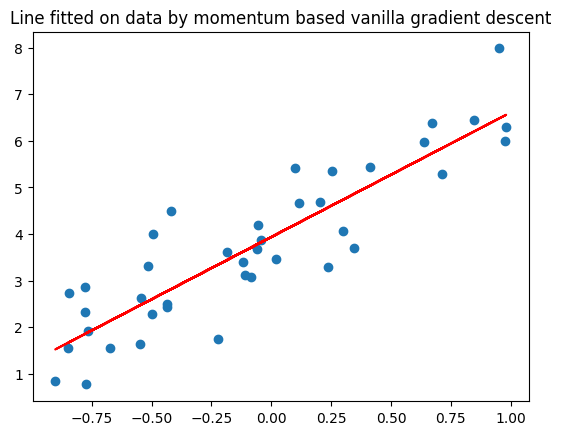

In [22]:
theta0_momentum = 0  
theta1_momentum = 0
v0 = 0
v1 = 0
beta = 0.9
lr = 0.1

theta0_vals = []
theta1_vals = []
momentum_vals = []
loss_valsv = []
for epoch in range(2000):
    ypred = theta0_momentum + theta1_momentum * x
    v0 = beta * v0 - (1 - beta) * (2 / len(x)) * sum(ytensor - ypred)
    v1 = beta * v1 - (1 - beta) * (2 / len(x)) * sum((ytensor - ypred) * x)

    theta0_momentum -= lr * v0
    theta1_momentum -= lr * v1
    loss = ((ytensor - (theta0_momentum + theta1_momentum * x)) ** 2).mean()
    loss_valsv.append(loss)
    theta0_vals.append(theta0_momentum)
    theta1_vals.append(theta1_momentum)
    momentum_vals.append((v0, v1))
    if abs(minloss-loss) < 0.001:
        print(f"Final MSE = {loss}")
        print(f"Converged in {epoch + 1} epochs")
        break

print(f"Theta0 for minimum loss function is: {theta0_momentum}")
print(f"Theta1 for minimum loss function is: {theta1_momentum}")

theta0_grid = np.linspace(-10, 10, 100)
theta1_grid = np.linspace(-10, 10, 100)
Theta0, Theta1 = np.meshgrid(theta0_grid, theta1_grid)
Loss = np.zeros_like(Theta0)
for i in range(len(theta0_grid)):
    for j in range(len(theta1_grid)):
        ypred_grid = Theta0[i, j] + Theta1[i, j] * x
        Loss[i, j] = ((ytensor - ypred_grid) ** 2).mean()

plt.figure(figsize=(10, 8))
contour = plt.contourf(Theta0, Theta1, Loss, levels=50, cmap="viridis")
plt.colorbar(contour)
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.title("Contour plot of the loss function")
plt.plot(theta0_vals, theta1_vals, 'ro-', label='Momentum Gradient Descent Path')
plt.legend()
plt.show()

plt.figure(figsize=(10, 8))
contour = plt.contour(Theta0, Theta1, Loss, levels=50, cmap="viridis")
plt.colorbar(contour)
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.title("Contour plot of the momentum")
for i in range(0, len(theta0_vals), max(1, len(theta0_vals) // 15)): 
    theta0 = theta0_vals[i]
    theta1 = theta1_vals[i]
    momentum0, momentum1 = momentum_vals[i]  
    plt.arrow(theta0, theta1, momentum0, momentum1, head_width=0.3, color='green', label="Momentum" if i == 0 else "")
plt.legend()
plt.show()

plt.figure(figsize=(10, 8))
contour = plt.contour(Theta0, Theta1, Loss, levels=50, cmap="viridis")
plt.colorbar(contour)
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.title("Contour plot of the gradient")
for i in range(0, len(theta0_vals), max(1, len(theta0_vals) // 15)):  
    theta0 = theta0_vals[i]
    theta1 = theta1_vals[i]
    grad0, grad1 = -(2 / len(x)) * sum(ytensor - (theta0 + theta1 * x)), -(2 / len(x)) * sum((ytensor - (theta0 + theta1 * x)) * x)
    plt.arrow(theta0, theta1, grad0, grad1, head_width=0.3, color='blue', label="Gradient" if i == 0 else "")


plt.legend()
plt.show()

# Plot the Loss vs Epochs
plt.figure(figsize=(8, 6))
plt.plot(range(len(loss_valsv)), loss_valsv, 'r-')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs (Momentum Gradient Descent)')
plt.show()

plt.scatter(x1,y)
line = theta0_momentum + theta1_momentum*x1
plt.plot(x1,line,'r')
plt.title('Line fitted on data by momentum based vanilla gradient descent')
plt.show()


Final MSE = 0.5963891026110578
Converged in 16 epochs
585
Theta0 for minimum loss function is: 3.9369277938919702
Theta1 for minimum loss function is: 2.6410531800935377


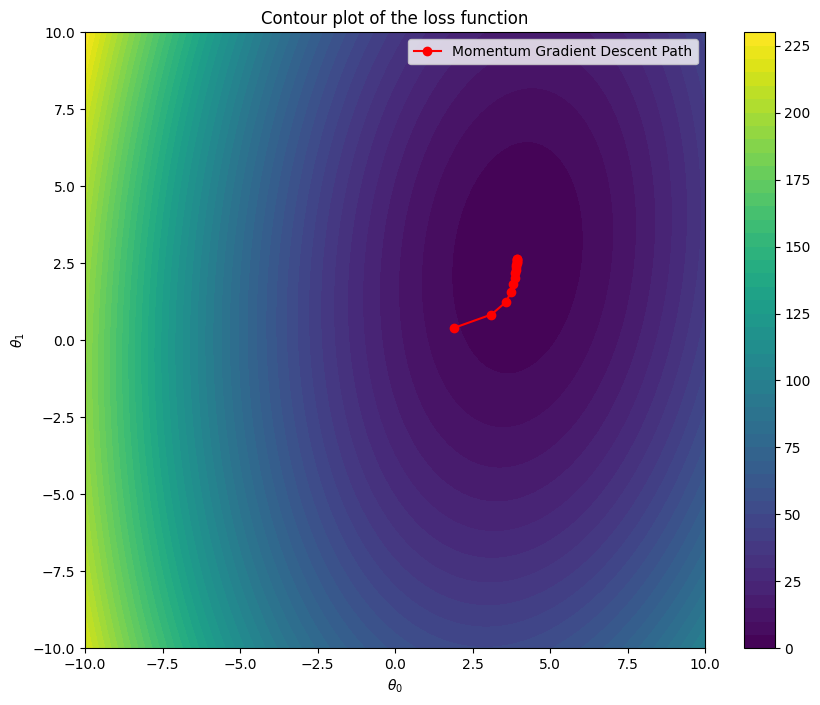

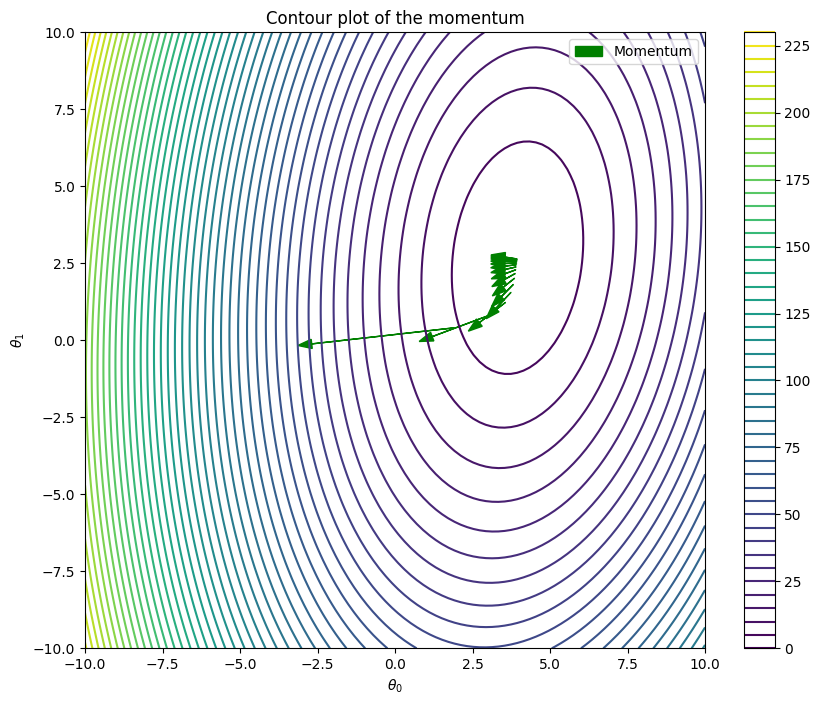

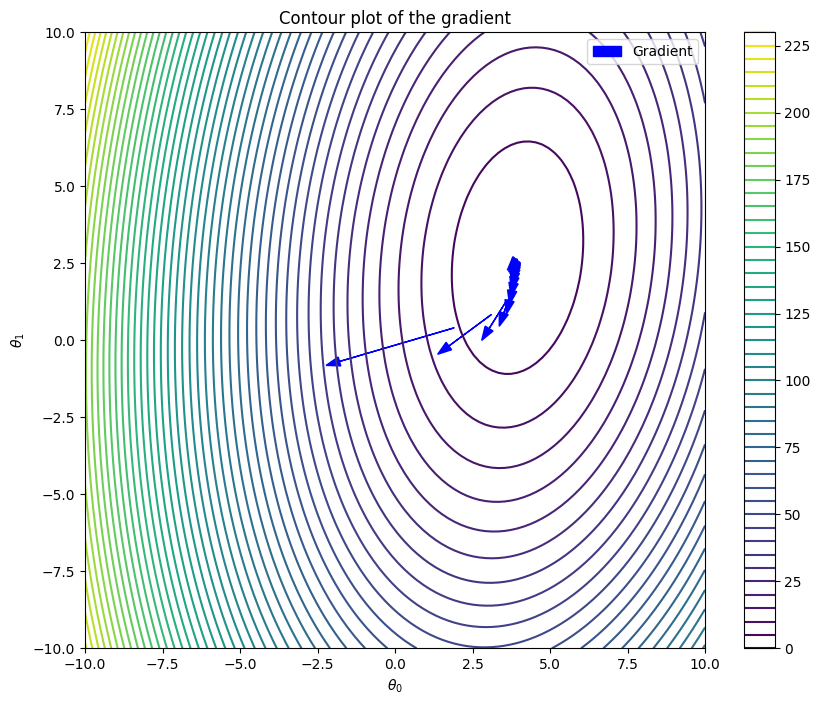

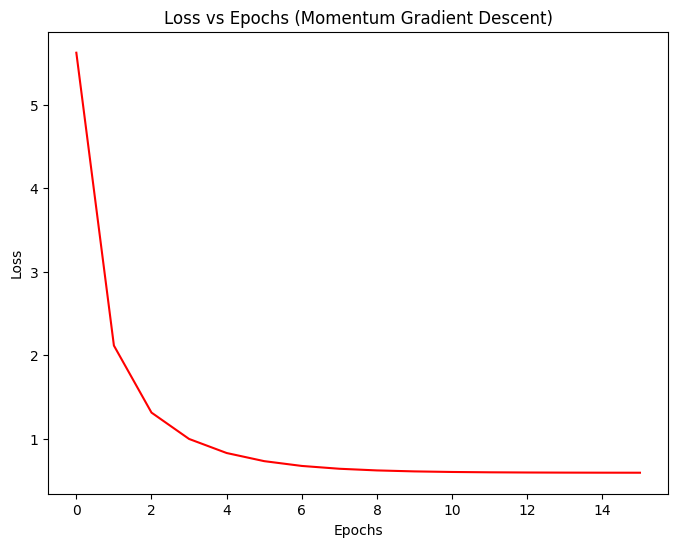

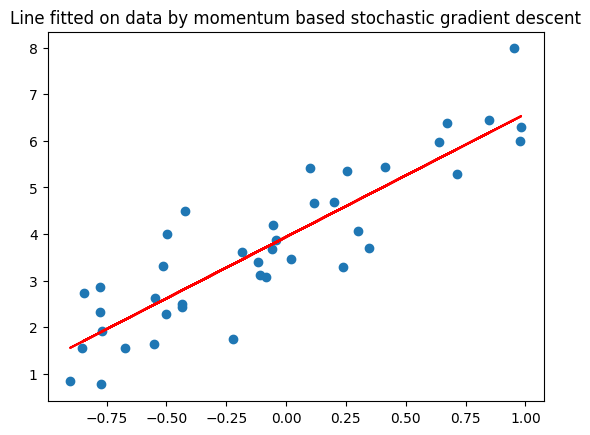

In [23]:
theta0_momentum = 0
theta1_momentum = 0
v0 = 0
v1 = 0
beta = 0.9
lr=0.01

theta0_vals = []
theta1_vals = []
momentum_vals = []
loss_valsvsgd = []
for epoch in range(150):
    for i in range(len(x)):
        ypred = theta0_momentum + theta1_momentum * x[i]
        v0 = beta * v0 - (1 - beta) * (2  * (ytensor[i] - ypred))
        v1 = beta * v1 - (1 - beta) * (2  * (ytensor[i] - ypred)*x[i])   
        theta0_momentum -= lr * v0
        theta1_momentum -= lr * v1
    loss = ((ytensor - (theta0_momentum + theta1_momentum * x)) ** 2).mean()
    loss_valsvsgd.append(loss)
    theta0_vals.append(theta0_momentum)
    theta1_vals.append(theta1_momentum)
    momentum_vals.append((v0, v1))
    if abs(minloss-loss) < 0.001:
        print(f"Final MSE = {loss}")
        print(f"Converged in {epoch + 1} epochs")
        print(epoch*(len(x) - 1))
        break

print(f"Theta0 for minimum loss function is: {theta0_momentum}")
print(f"Theta1 for minimum loss function is: {theta1_momentum}")

theta0_grid = np.linspace(-10, 10, 100)
theta1_grid = np.linspace(-10, 10, 100)
Theta0, Theta1 = np.meshgrid(theta0_grid, theta1_grid)
Loss = np.zeros_like(Theta0)
for i in range(len(theta0_grid)):
    for j in range(len(theta1_grid)):
        ypred_grid = Theta0[i, j] + Theta1[i, j] * x
        Loss[i, j] = ((ytensor - ypred_grid) ** 2).mean()

plt.figure(figsize=(10, 8))
contour = plt.contourf(Theta0, Theta1, Loss, levels=50, cmap="viridis")
plt.colorbar(contour)
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.title("Contour plot of the loss function")
plt.plot(theta0_vals, theta1_vals, 'ro-', label='Momentum Gradient Descent Path')
plt.legend()
plt.show()

plt.figure(figsize=(10, 8))
contour = plt.contour(Theta0, Theta1, Loss, levels=50, cmap="viridis")
plt.colorbar(contour)
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.title("Contour plot of the momentum")
for i in range(0, len(theta0_vals), max(1, len(theta0_vals) // 10)): 
    theta0 = theta0_vals[i]
    theta1 = theta1_vals[i]
    momentum0, momentum1 = momentum_vals[i]  
    plt.arrow(theta0, theta1, momentum0, momentum1, head_width=0.3, color='green', label="Momentum" if i == 0 else "")
plt.legend()
plt.show()

plt.figure(figsize=(10, 8))
contour = plt.contour(Theta0, Theta1, Loss, levels=50, cmap="viridis")
plt.colorbar(contour)
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.title("Contour plot of the gradient")
for i in range(0, len(theta0_vals), max(1, len(theta0_vals) // 10)):  
    theta0 = theta0_vals[i]
    theta1 = theta1_vals[i]
    grad0, grad1 = -(2 / len(x)) * sum(ytensor - (theta0 + theta1 * x)), -(2 / len(x)) * sum((ytensor - (theta0 + theta1 * x)) * x)
    plt.arrow(theta0, theta1, grad0, grad1, head_width=0.3, color='blue', label="Gradient" if i == 0 else "")
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(range(len(loss_valsvsgd)), loss_valsvsgd, 'r-')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs (Momentum Gradient Descent)')
plt.show()

plt.scatter(x1,y)
line = theta0_momentum + theta1_momentum*x1
plt.plot(x1,line,'r')
plt.title('Line fitted on data by momentum based stochastic gradient descent')
plt.show()

#### Momentum based gradient descent converges faster than vanilla and stochastic gradient descent as it uses past gradients to smooth out fluctuations.
 #### Momentum based gradient descent reduces oscillations and smoothens path toward optimal solution. Applying it in stochastic gradient descent also reduces noise.

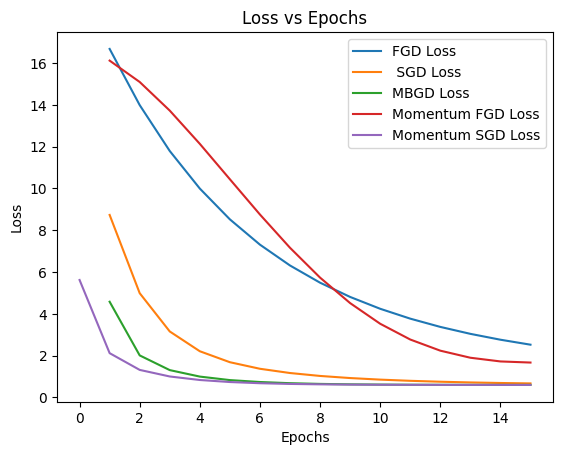

In [24]:
plt.plot(range(1,16), loss_vals[0:15], label='FGD Loss')
plt.plot(range(1,16), loss_valsgd[0:15], label=' SGD Loss')
plt.plot(range(1,16), loss_valsm[0:15], label='MBGD Loss')
plt.plot(range(1,16), loss_valsv[0:15], label='Momentum FGD Loss')
plt.plot(range(len(loss_valsvsgd)), loss_valsvsgd, label='Momentum SGD Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.show()

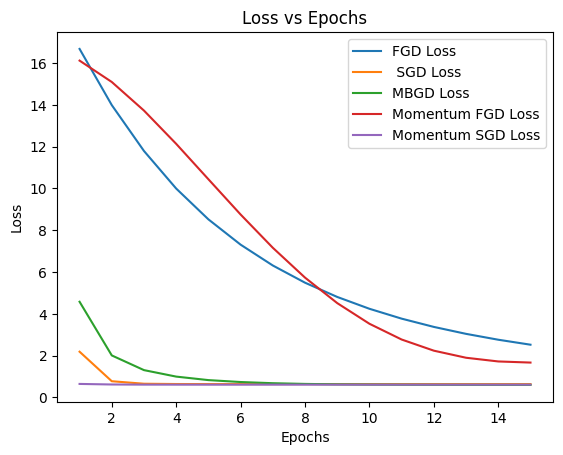

In [27]:
theta0_sgd = 10
theta1_sgd = 10
theta0_vals = []
theta1_vals = []  
loss_valsgd = []  
lr = 0.1
for epoch in range(2000):
    for i in range(len(x)):
        ypred = theta0_sgd + theta1_sgd * x[i]
        theta0_sgd -= -lr*(ytensor[i]-ypred)
        theta1_sgd -= -lr*((ytensor[i]-ypred)*x[i])
    loss = ((ytensor - theta0_sgd-theta1_sgd*x) ** 2).mean()
    loss_valsgd.append(loss)
    theta0_vals.append(theta0_sgd)
    theta1_vals.append(theta1_sgd)
    
    
theta0_momentum = 0
theta1_momentum = 0
v0 = 0
v1 = 0
beta = 0.9
theta0_vals = []
theta1_vals = []
momentum_vals = []
loss_valsvsgd = []
for epoch in range(150):
    for i in range(len(x)):
        ypred = theta0_momentum + theta1_momentum * x[i]
        v0 = beta * v0 - (1 - beta) * (2  * (ytensor[i] - ypred))
        v1 = beta * v1 - (1 - beta) * (2  * (ytensor[i] - ypred)*x[i])   
        theta0_momentum -= lr * v0
        theta1_momentum -= lr * v1
    loss = ((ytensor - (theta0_momentum + theta1_momentum * x)) ** 2).mean()
    loss_valsvsgd.append(loss)
    theta0_vals.append(theta0_momentum)
    theta1_vals.append(theta1_momentum)
    momentum_vals.append((v0, v1))

plt.plot(range(1,16), loss_vals[0:15], label='FGD Loss')
plt.plot(range(1,16), loss_valsgd[0:15], label=' SGD Loss')
plt.plot(range(1,16), loss_valsm[0:15], label='MBGD Loss')
plt.plot(range(1,16), loss_valsv[0:15], label='Momentum FGD Loss')
plt.plot(range(1,16), loss_valsvsgd[0:15], label='Momentum SGD Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.show()
